#Analisi diffusione COVID-19 nel mondo Il committente richiede di avere un report su casi e vaccinazioni in diverse aree del mondo; a tal fine, richiede di utilizzare il dataset, curato da Our World in Data, all'indirizzo https://github.com/owid/covid-19-data/tree/master/public/data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
#Si richiede di verificare le dimensioni del dataset e i relativi metadati
url="https://covid.ourworldindata.org/data/owid-covid-data.csv"
db=pd.read_csv(url)
db.dropna
db["location"]=db["location"].astype("str")
db

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          NaN        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          NaN        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          NaN        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          NaN        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          NaN        0.0   
...         ...       ...          ...         ...          ...        ...   
388915      ZWE    Africa     Zimbabwe  2024-03-20     266359.0        0.0   
388916      ZWE    Africa     Zimbabwe  2024-03-21     266359.0        0.0   
388917      ZWE    Africa     Zimbabwe  2024-03-22     266359.0        0.0   
388918      ZWE    Africa     Zimbabwe  2024-03-23     266359.0        0.0   
388919      ZWE    Africa     Zimbabwe  2024-03-24     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
388915                 0.0        5740.0         0.0                  0.0   
388916                 0.0        5740.0         0.0                  0.0   
388917                 0.0        5740.0         0.0                  0.0   
388918                 0.0        5740.0         0.0                  0.0   
388919                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
388915  ...          30.7                  36.791                         1.7   
388916  ...          30.7                  36.791                         1.7   
388917  ...          30.7                  36.791                         1.7   
388918  ...          30.7                  36.791                         1.7   
388919  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
388915            61.49                    0.571  16320539.0   
388916            61.49                    0.571  16320539.0   
388917            61.49                    0.571  16320539.0   
388918            61.49                    0.571  16320539.0   
388919            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

In [3]:
db_f1=db.fillna({"continent":"vuoto","total_cases":0})
db_f2 = db_f1[db_f1["continent"]!="vuoto"]
db_f2

iso_code continent     location        date  total_cases  new_cases  \
0           AFG      Asia  Afghanistan  2020-01-05          0.0        0.0   
1           AFG      Asia  Afghanistan  2020-01-06          0.0        0.0   
2           AFG      Asia  Afghanistan  2020-01-07          0.0        0.0   
3           AFG      Asia  Afghanistan  2020-01-08          0.0        0.0   
4           AFG      Asia  Afghanistan  2020-01-09          0.0        0.0   
...         ...       ...          ...         ...          ...        ...   
388915      ZWE    Africa     Zimbabwe  2024-03-20     266359.0        0.0   
388916      ZWE    Africa     Zimbabwe  2024-03-21     266359.0        0.0   
388917      ZWE    Africa     Zimbabwe  2024-03-22     266359.0        0.0   
388918      ZWE    Africa     Zimbabwe  2024-03-23     266359.0        0.0   
388919      ZWE    Africa     Zimbabwe  2024-03-24     266359.0        0.0   

        new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  \
0                      NaN           NaN         0.0                  NaN   
1                      NaN           NaN         0.0                  NaN   
2                      NaN           NaN         0.0                  NaN   
3                      NaN           NaN         0.0                  NaN   
4                      NaN           NaN         0.0                  NaN   
...                    ...           ...         ...                  ...   
388915                 0.0        5740.0         0.0                  0.0   
388916                 0.0        5740.0         0.0                  0.0   
388917                 0.0        5740.0         0.0                  0.0   
388918                 0.0        5740.0         0.0                  0.0   
388919                 0.0        5740.0         0.0                  0.0   

        ...  male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0       ...           NaN                  37.746                         0.5   
1       ...           NaN                  37.746                         0.5   
2       ...           NaN                  37.746                         0.5   
3       ...           NaN                  37.746                         0.5   
4       ...           NaN                  37.746                         0.5   
...     ...           ...                     ...                         ...   
388915  ...          30.7                  36.791                         1.7   
388916  ...          30.7                  36.791                         1.7   
388917  ...          30.7                  36.791                         1.7   
388918  ...          30.7                  36.791                         1.7   
388919  ...          30.7                  36.791                         1.7   

        life_expectancy  human_development_index  population  \
0                 64.83                    0.511  41128772.0   
1                 64.83                    0.511  41128772.0   
2                 64.83                    0.511  41128772.0   
3                 64.83                    0.511  41128772.0   
4                 64.83                    0.511  41128772.0   
...                 ...                      ...         ...   
388915            61.49                    0.571  16320539.0   
388916            61.49                    0.571  16320539.0   
388917            61.49                    0.571  16320539.0   
388918            61.49                    0.571  16320539.0   
388919            61.49                    0.571  16320539.0   

        excess_mortality_cumulative_absolute  excess_mortality_cumulative  \
0                                        NaN                          NaN   
1                                        NaN                          NaN   
2                                        NaN                          NaN   
3                                        NaN                          NaN   
4                 

In [4]:
print(db_f2.shape)
print(db_f2.info())

(370329, 67)
<class 'pandas.core.frame.DataFrame'>
Index: 370329 entries, 0 to 388919
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    370329 non-null  object 
 1   continent                                   370329 non-null  object 
 2   location                                    370329 non-null  object 
 3   date                                        370329 non-null  object 
 4   total_cases                                 370329 non-null  float64
 5   new_cases                                   359482 non-null  float64
 6   new_cases_smoothed                          358312 non-null  float64
 7   total_deaths                                309640 non-null  float64
 8   new_deaths                                  359798 non-null  float64
 9   new_deaths_smoothed                         358628 non-null  f

In [5]:
#Si chiede poi per ogni continente di trovare il numero di casi totali avvenuti in quello stesso continente;
#si chiede di non considerare eventuali locazioni che nel dataset non appartengono ad alcun continente;
tot_continente=db_f2.groupby('continent')['new_cases'].sum()
print(tot_continente)

continent
Africa            13141439.0
Asia             301451451.0
Europe           252417184.0
North America    124530677.0
Oceania           14814266.0
South America     68844492.0
Name: new_cases, dtype: float64


In [18]:
#Sempre riguardo i casi totali, si chiede di scrivere del codice che, date due variabili contenenti i nomi di continenti, ne confronti i seguenti relativi descrittori statistici: 
#valore massimo, media, e percentuale rispetto al numero dei casi totali nel mondo (calcolati anche sulle locazioni senza indicazione di continente);

oc='Oceania'
eu='Europe'

perc=tot_continente/tot_continente.sum()
stat_continente=db_f2.groupby(["continent"])["total_cases"].agg(["sum", "max", "mean"]).round()

db_merge=pd.concat([perc, stat_continente])
db_merge.columns=['Percentuale_Casi_Totali', 'Casi_totali', 'Max_Casi', 'Media_Casi']

stat_oceania=(db_merge.loc[oc])
stat_europa=(db_merge.loc[eu])
print(stat_oceania)
print(stat_europa)

           Percentuale_Casi_Totali   Casi_totali    Max_Casi  Media_Casi
continent                                                               
Oceania                    0.01911           NaN         NaN         NaN
Oceania                        NaN  9.609695e+09  11817320.0    259799.0
           Percentuale_Casi_Totali   Casi_totali    Max_Casi  Media_Casi
continent                                                               
Europe                    0.325616           NaN         NaN         NaN
Europe                         NaN  2.031561e+11  38997490.0   2421119.0


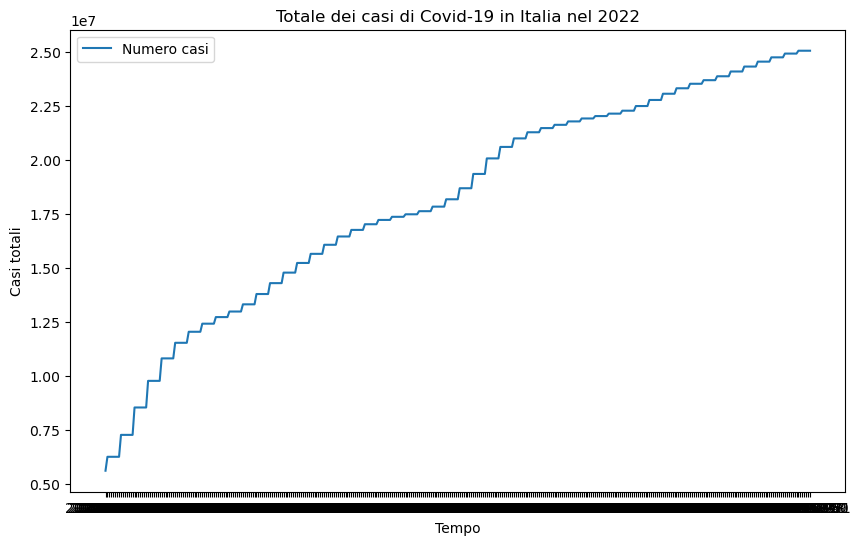

In [7]:
#Selezionare i dati relativi all'Italia nel 2022
#Mostrare con un grafico adeguato l'evoluzione del casi totali rispetto alla data
italia_2022=db_f2[(db_f2['location']=='Italy')&(db['date'].str.startswith('2022'))]
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['total_cases'], label='Numero casi')
plt.xlabel('Tempo')
plt.ylabel('Casi totali')
plt.title('Totale dei casi di Covid-19 in Italia nel 2022')
plt.legend()
plt.show()

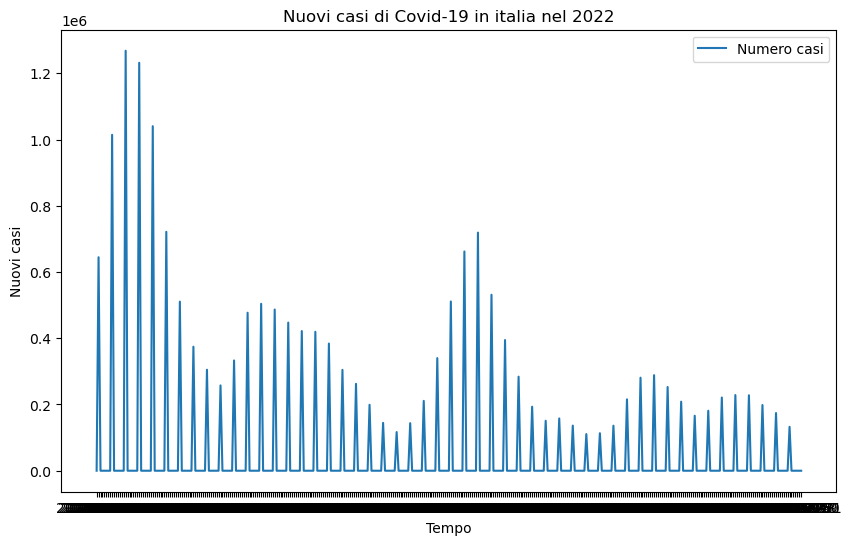

In [8]:
#Mostrare poi con un grafico adeguato il numero di nuovi casi rispetto alla data (filtrare i dati se necessario). 
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['new_cases'], label='Numero casi')
plt.xlabel('Tempo')
plt.ylabel('Nuovi casi')
plt.title('Nuovi casi di Covid-19 in italia nel 2022')
plt.legend()
plt.show()

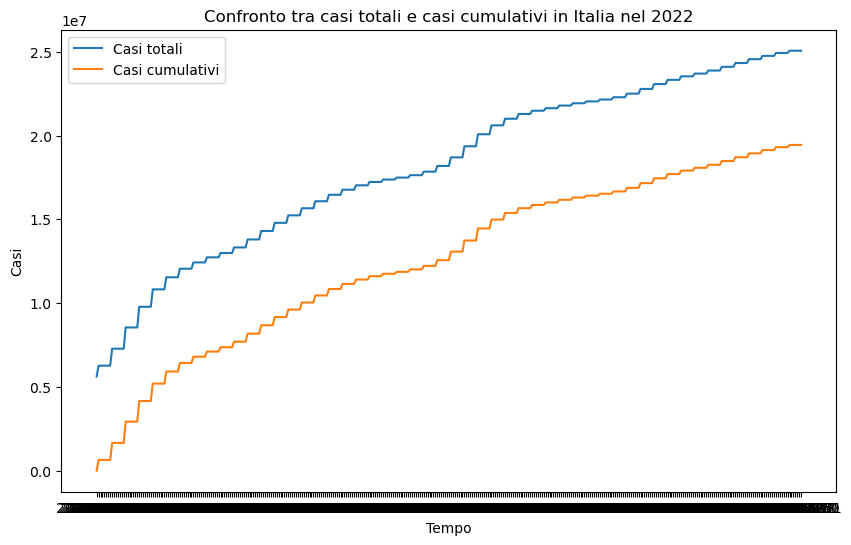

In [9]:
#Mostrare infine un grafico che mostra l'andamento della somma cumulativa nuovi casi del 2022
#Commentare se ci sono similarità con l'andamento del numero dei casi totali;
ita_cumul=italia_2022['new_cases'].cumsum()
plt.figure(figsize=(10, 6))
plt.plot(italia_2022['date'], italia_2022['total_cases'], label='Casi totali')
plt.plot(italia_2022['date'], ita_cumul, label='Casi cumulativi')
plt.xlabel('Tempo')
plt.ylabel('Casi')
plt.title('Confronto tra casi totali e casi cumulativi in Italia nel 2022')
plt.legend()
plt.show()
 
#Sul grafico possiamo osservare come il numero di casi totali sia aumentato in modo costante nel 2022. Anche i casi cumulativi appaiono in crescita, ma più lenta. 
#I casi totali crescono in modo quasi esponenziale, ciò sta a significare che il virus si stava diffondendo molto rapidamente, probabilmente si trattava di una nuova variante. 
#La curva dei casi cumulativi indica che il numero di nuovi casi di COVID-19 era in diminuzione. 
#I due grafici mostrano una sorta di divario crescente, ciò sta a significare che molte persone non denunciavano la positività all'infezione da COVID-19

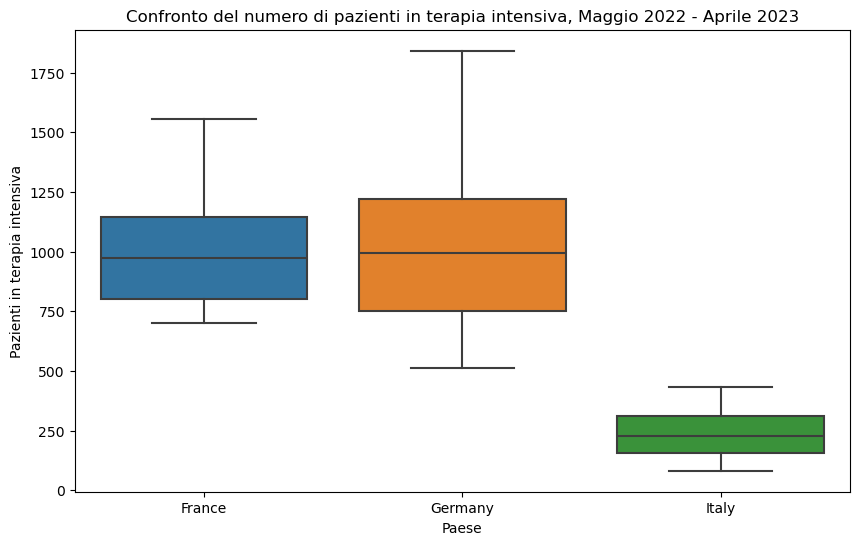

In [10]:
#Riguardo le nazioni di Italia, Germania e Francia, mostrare in un boxplot la differenza tra queste nazioni riguardo il numero di pazienti in terapia intensiva (Intensive Care Unit, ICU) da maggio 2022 (incluso) ad aprile 2023 (incluso)
#Scrivere un breve commento a riguardo;
igf_data=db_f2[(db_f2['location'].isin(['Italy', 'Germany', 'France'])) & (db_f2['date'].between('2022-05-01', '2023-04-30'))]
plt.figure(figsize=(10, 6))
sns.boxplot(x='location', y='icu_patients', data=igf_data)
plt.title('Confronto del numero di pazienti in terapia intensiva, Maggio 2022 - Aprile 2023')
plt.xlabel('Paese')
plt.ylabel('Pazienti in terapia intensiva')
plt.show()
#Graficamente è possibile apprezzare come la situazione generale dell'Italia sia molto diversa da Germania e Francia. 
#Nel nostro paese ci sono stati più casi, probabilmente a causa dell'età media molto alta, in Francia meno casi di tutte e tre le nazioni. 
#Germania e Francia hanno vissuto una situazione simile, ma in Germania i dati sono stati raccolti meglio.

In [28]:
#Riguardo le nazioni di Italia, Germania, Francia e Spagna nel 2023, mostrare la somma dei pazienti ospedalizzati per ognuna
#Se ci sono dati nulli, suggerire se può essere possibile gestirli tramite sostituzione o meno.
igfs_data_2023=db_f2.loc[(db_f2["location"].isin(["Italy", "Germany", "France", "Spain"]))&(db_f2["date"].between("2023-01-01", "2023-12-31"))]
somma_osp_2023=igfs_data_2023.groupby("location")["hosp_patients"].max()
print(somma_osp_2023)

location
France     24157.0
Germany        NaN
Italy       8409.0
Spain       3585.0
Name: hosp_patients, dtype: float64


In [31]:
#Poiché i valori della Germania sono nulli sommiamo i valori di weekly_hosp_admissions del periodo interessato dividendo poi per il numero di settimane 52
#Otteniamo un valore che ci permette di avere un'idea 
g_data=db_f2.loc[(db_f2['location'].isin(['Germany']))&(db_f2["date"].between("2023-01-01", "2023-12-31"))]
somma_g_2023=g_data.groupby("location")["weekly_hosp_admissions"].sum()
(somma_g_2023/52).round()

location
Germany    17265.0
Name: weekly_hosp_admissions, dtype: float64